# Demo 18

In [2]:
import pandas as pd
import sklearn
import numpy as np

import matplotlib.pyplot as plt

## Hyperparameter Tuning

### Dataset

We will use data from [Victorian Era Authorship Attribution Data Set](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution#)

**Instructions:**

- Open up a terminal
- `cd` into `data/`
- make a new directory for victorian author id
- wget https://archive.ics.uci.edu/ml/machine-learning-databases/00454/dataset.zip
- unzip the dataset

In [3]:
df = pd.read_csv("data/victorian_author_id/dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv")
df.shape

(53678, 2)

In [4]:
df.keys()

Index(['text', 'author'], dtype='object')

In [5]:
len(df['author'].unique())

45

In [6]:
df['author'].value_counts()

8     6914
26    4441
14    2696
37    2387
45    2312
21    2307
39    2266
48    1825
33    1742
19    1543
4     1483
15    1460
43    1266
38    1163
25    1159
9     1108
18    1078
42    1022
30     972
50     914
1      912
41     911
28     823
10     755
32     703
36     693
17     660
35     659
29     645
12     627
46     605
20     587
22     495
13     485
44     468
23     455
34     453
40     430
6      407
11     383
2      382
24     380
27     306
3      213
16     183
Name: author, dtype: int64

Its a good idea to check if there are duplicates

In [7]:
df['text'].drop_duplicates().shape

(53678,)

Let's just look at the 5 most frequent authors

In [8]:
top4_authors = df['author'].value_counts()[:5].index
top4_authors

Int64Index([8, 26, 14, 37, 45], dtype='int64')

In [9]:
df[df['author'].map(lambda x: x in top4_authors)]

,text,author
3397,t is only the railroad the arches of the railr...,8
3398,partially enveloped the seed ned the same kind...,8
3399,king s sake how gladly we repeat it sailing on...,8
3400,why is this we shall soon see we push through ...,8
3401,bear don t cry so loud bony is not here she to...,8
...,...,...
50329,had touched the heart of the victim who lay on...,45
50330,to do these things as well as his confused and...,45
50331,he said let us go back towards it again they t...,45
50332,had rendered her progress a noiseless one so f...,45


In [10]:
df = df[df['author'].map(lambda x: x in top4_authors)]
df.shape

(18750, 2)

In [12]:
df[df['author'] == 8].iloc[0]['text']

't is only the railroad the arches of the railroad span the house the wires of the electric stretch over the confined scene of his daily life the engines fly past him on their errands and the birds and what can the man of prejudice and usage hope for but to be and flung into oblivion look to it gentlemen of precedent and custom household words during a fresh war the supposed prize was upon by england with another expedition four thousand men under sir david landed in s bay a little to the north of cape town presently fought a battle with the dutch defeated them and took the cape town by two days afterwards the whole colony was soon ab to the british and being confirmed t england by the peace of we have since had undisturbed possession the internal t of the cape colony after its first establishment was for a long time very simple the dutch increased and multiplied together with their flocks and herds a pasture farm requiring elbow room there were always many who preferred passing the bo

#### Partitioning dataset

Let's make train, dev, and test splits that are 80:10:10

First shuffle the dataset

In [13]:
df.sample(frac=1)

,text,author
14250,of the disease but solely on its external if t...,14
48563,do not plain iy if she suits for ihe chosen to...,45
15743,up over our door since afore the heads went ou...,14
14403,might securely be drawn from the flowing of bl...,14
16329,no dear knowledge concerning the mother s brea...,14
...,...,...
49398,and example but though was the of that literat...,45
29730,nothing to me it would seem only a commercial ...,26
16082,she has been under a disadvantage with such a ...,14
40417,so many well meaning creatures must we not sup...,37


In [14]:
df = df.sample(frac=1)
df.head(5)

,text,author
28303,an end to which both of them submitted without...,26
38722,out to join them before them roll the mists of...,37
3887,extent a man especially a man brought down as ...,8
8395,the christmas at which communication and both ...,8
3911,mysteries by making himself acquainted with ti...,8


Now split our data into appropriate partitions for training and testing

In [15]:
train_max_idx = int(df.shape[0] * .8)
dev_max_idx = int((df.shape[0] * .1) + train_max_idx)


train_max_idx, dev_max_idx

(15000, 16875)

In [16]:
train_df = df.iloc[:train_max_idx]
dev_df = df.iloc[train_max_idx:dev_max_idx]
test_df = df.iloc[dev_max_idx:]

train_df.shape, dev_df.shape, test_df.shape

((15000, 2), (1875, 2), (1875, 2))

### Train a model

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [20]:
%%time

vectorizer.fit(train_df['text'])

CPU times: user 8.81 s, sys: 107 ms, total: 8.92 s
Wall time: 8.92 s


CountVectorizer()

In [21]:
X_train = vectorizer.transform(train_df['text'])
X_dev = vectorizer.transform(dev_df['text'])
# X_test = vectorizer.transform(test_df['text'])

In [22]:
%%time 

nb_model.fit(X_train, train_df['author'])

CPU times: user 44.4 ms, sys: 1.15 ms, total: 45.5 ms
Wall time: 44.2 ms


MultinomialNB()

In [23]:
nb_model.score(X_train, train_df['author'])

0.9465333333333333

In [24]:
nb_model.score(X_dev, dev_df['author'])

0.9376

#### Let's modify the value for smoothing

By default, Laplacian smoothing (add-one) is used. But lets change the value and see what happens

In [25]:
nb_model = MultinomialNB(alpha=10)
nb_model

MultinomialNB(alpha=10)

In [26]:
%%time 

nb_model.fit(X_train, train_df['author'])

CPU times: user 45.4 ms, sys: 1.04 ms, total: 46.5 ms
Wall time: 45.2 ms


MultinomialNB(alpha=10)

In [27]:
nb_model.score(X_train, train_df['author'])

0.9424

In [28]:
nb_model.score(X_dev, dev_df['author'])

0.9349333333333333

**Question:** Was add-10 smoothing better than add-one?

Let's look at add-two smoothing

In [29]:
nb_model = MultinomialNB(alpha=2)
nb_model.fit(X_train, train_df['author'])
nb_model.score(X_train, train_df['author']), nb_model.score(X_dev, dev_df['author'])

(0.9456, 0.9376)

Let's look at no smoothing

In [30]:
nb_model = MultinomialNB(alpha=0)
nb_model.fit(X_train, train_df['author'])
nb_model.score(X_train, train_df['author']), nb_model.score(X_dev, dev_df['author'])

/opt/conda/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


(0.9506666666666667, 0.9386666666666666)

Let's loop through lots of values and see differences in accuracy

In [31]:
from tqdm import tqdm

smoothing_values = np.arange(0,15, 0.5)
train_accuracy, dev_accuracy = [], []

for smoothing_value in tqdm(smoothing_values):
    nb_model = MultinomialNB(alpha=smoothing_value)
    nb_model.fit(X_train, train_df['author'])
    train_accuracy.append(nb_model.score(X_train, train_df['author']))
    dev_accuracy.append(nb_model.score(X_dev, dev_df['author']))
    
results_df = pd.DataFrame({'alpha': smoothing_values, 
              'train_accuracy': train_accuracy,
             'dev_accuracy': dev_accuracy})

  0%|          | 0/30 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
100%|██████████| 30/30 [00:02<00:00, 10.52it/s]


In [32]:
smoothing_values

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5])

In [33]:
results_df

,alpha,train_accuracy,dev_accuracy
0,0.0,0.950667,0.938667
1,0.5,0.947200,0.937600
2,1.0,0.946533,0.937600
3,1.5,0.946067,0.937600
4,2.0,0.945600,0.937600
5,2.5,0.945400,0.937600
6,3.0,0.945000,0.937600
7,3.5,0.944867,0.937600
8,4.0,0.944733,0.938133
9,4.5,0.944200,0.937600


<AxesSubplot:xlabel='alpha'>

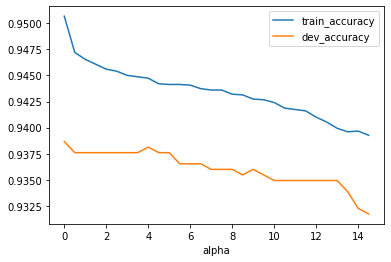

In [34]:
results_df.plot(kind='line', x='alpha')

**Question:** From the above, which value of smoothing seemd to work the best?

In [35]:
results_df['dev_accuracy'].argmax()

0

So now we will use that value for the model we apply to our held-out test data

In [36]:
best_alpha = results_df.loc[results_df['dev_accuracy'].argmax()]['alpha']
best_alpha

0.0

In [37]:
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_train, train_df['author'])

X_test = vectorizer.transform(test_df['text'])

nb_model.score(X_test, test_df['author'])

/opt/conda/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


0.9466666666666667

(back to slides)

## Metrics beyond accuracy

In [38]:
import nltk
moview_reviews = nltk.corpus.movie_reviews
review_files = [(file_id, file_id.startswith("pos")) for file_id in moview_reviews.fileids()]

df = pd.DataFrame(review_files)
df = df.rename(columns={0: "file_name", 1: "gold-label"})

def read_mov_review(f_name):
    return moview_reviews.open(f_name).read()

df['review_text'] = df['file_name'].apply(read_mov_review)

In [39]:
df.shape

(2000, 3)

In [42]:
sum(df['gold-label'])

1000

In [46]:
df['gold-label'].map(lambda x: "True" if x else "False").value_counts()

False    1000
True     1000
Name: gold-label, dtype: int64

In [47]:
df[df['gold-label'] == False].sample(1000 - 150).index

Int64Index([735, 670,  44, 559, 778, 693,  30, 431, 289, 779,
            ...
            848, 796, 703, 885, 950, 728, 966, 173, 294, 736],
           dtype='int64', length=850)

In [48]:
df.drop(index= df[df['gold-label'] == False].sample(1000 - 150).index)

,file_name,gold-label,review_text
2,neg/cv002_17424.txt,False,it is movies like these that make a jaded movi...
12,neg/cv012_29411.txt,False,and now the high-flying hong kong style of fil...
16,neg/cv016_4348.txt,False,i'm really starting to wonder about alicia sil...
17,neg/cv017_23487.txt,False,so what do you get when you mix together plot ...
20,neg/cv020_9234.txt,False,""" spawn "" features good guys , bad guys , lot..."
...,...,...,...
1995,pos/cv995_21821.txt,True,wow ! what a movie . \nit's everything a movie...
1996,pos/cv996_11592.txt,True,"richard gere can be a commanding actor , but h..."
1997,pos/cv997_5046.txt,True,"glory--starring matthew broderick , denzel was..."
1998,pos/cv998_14111.txt,True,steven spielberg's second epic film on world w...


In [49]:
tmp_df = df.drop(index= df[df['gold-label'] == False].sample(1000 - 150).index)

In [50]:
tmp_df = tmp_df.sample(frac=1)

In [51]:
tmp_df['gold-label'].value_counts()#normalize=True)

True     1000
False     150
Name: gold-label, dtype: int64

In [52]:
tmp_df['gold-label'].value_counts(normalize=True)

True     0.869565
False    0.130435
Name: gold-label, dtype: float64

In [53]:
train_max_idx = int(tmp_df.shape[0] * .8)
dev_max_idx = int((tmp_df.shape[0] * .1) + train_max_idx)


train_max_idx, dev_max_idx

train_df = tmp_df.iloc[:train_max_idx]
dev_df = tmp_df.iloc[train_max_idx:dev_max_idx]
test_df = tmp_df.iloc[dev_max_idx:]

train_df.shape, dev_df.shape, test_df.shape

((920, 3), (115, 3), (115, 3))

In [54]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_df['review_text'])

X_train = vectorizer.transform(train_df['review_text'])
X_dev = vectorizer.transform(dev_df['review_text'])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

clf = LogisticRegression(max_iter=1e3, C=100)
#clf = MultinomialNB()
#clf = MLPClassifier(hidden_layer_sizes=10)
clf.fit(X_train, train_df['gold-label'])

clf.score(X_train, train_df['gold-label']), clf.score(X_dev, dev_df['gold-label'])

(1.0, 0.8956521739130435)

In [59]:
train_df['gold-label'].value_counts(normalize=True)

True     0.872826
False    0.127174
Name: gold-label, dtype: float64

In [60]:
dev_df['gold-label'].value_counts(normalize=True)

True     0.852174
False    0.147826
Name: gold-label, dtype: float64

**Question:** What might be misleading about the dev accuracy?

<details>
<summary>Hint</summary>
    Think about value_counts from above
</details>

In [ ]:
dev_df['gold-label'].value_counts(normalize=True)

In [61]:
clf.predict(X_dev)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [62]:
pd.Series(clf.predict(X_dev)).value_counts()

True     102
False     13
dtype: int64

In [63]:
dev_df = dev_df.assign(prediction = clf.predict(X_dev))

In [66]:
dev_df[(dev_df['prediction'] == True) & (dev_df['gold-label'] == True)]

,file_name,gold-label,review_text,prediction
1650,pos/cv650_14340.txt,True,james cmaeron's breakthrough feature was the f...,True
1263,pos/cv263_19259.txt,True,"american pie acknowledges a cold , hard fact t...",True
1508,pos/cv508_16006.txt,True,maybe the most important thing about this movi...,True
1540,pos/cv540_3421.txt,True,i am starting to write this review before goin...,True
1608,pos/cv608_23231.txt,True,"magnolia left me relling from the theatre , st...",True
...,...,...,...,...
1551,pos/cv551_10565.txt,True,after the simple looking little spacecraft lan...,True
1938,pos/cv938_10220.txt,True,the idea at the center of the devil's advocate...,True
1581,pos/cv581_19381.txt,True,eyes wide shut isn't the masterpiece many were...,True
1378,pos/cv378_20629.txt,True,oliver stone's latest feature is the last one ...,True


In [64]:
dev_df

,file_name,gold-label,review_text,prediction
1650,pos/cv650_14340.txt,True,james cmaeron's breakthrough feature was the f...,True
1263,pos/cv263_19259.txt,True,"american pie acknowledges a cold , hard fact t...",True
1508,pos/cv508_16006.txt,True,maybe the most important thing about this movi...,True
1540,pos/cv540_3421.txt,True,i am starting to write this review before goin...,True
654,neg/cv654_19345.txt,False,you think that these people only exist in the ...,True
...,...,...,...,...
1938,pos/cv938_10220.txt,True,the idea at the center of the devil's advocate...,True
1581,pos/cv581_19381.txt,True,eyes wide shut isn't the masterpiece many were...,True
514,neg/cv514_12173.txt,False,"i didn't hate the big hit , even though it is ...",True
1378,pos/cv378_20629.txt,True,oliver stone's latest feature is the last one ...,True


In [67]:
sklearn.metrics.confusion_matrix(dev_df['prediction'], dev_df['gold-label'])

array([[ 9,  4],
       [ 8, 94]])

In [69]:
sklearn.metrics.confusion_matrix(dev_df['prediction'], dev_df['gold-label'], normalize='true')

array([[0.69230769, 0.30769231],
       [0.07843137, 0.92156863]])

In [70]:
sklearn.metrics.precision_score(dev_df['prediction'], dev_df['gold-label'])

0.9591836734693877

In [71]:
sklearn.metrics.recall_score(dev_df['prediction'], dev_df['gold-label'])

0.9215686274509803

In [72]:
sklearn.metrics.f1_score(dev_df['prediction'], dev_df['gold-label'])

0.9400000000000001

(back to slides)


## K-Means walkthrough

Example comes from https://stackoverflow.com/questions/65449241/plotting-the-kmeans-cluster-centers-for-every-iteration-in-python.

I'd recommend going through this [blog post](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c)

## Dataset - Obits from HW02

Now lets look at using kmeans to cluster documents

Load in data. This takes a little while.

In [73]:
df = pd.read_csv("data/tfidf_hw02.csv.gz", compression="gzip")
df.shape

(364, 35049)

In [74]:
df.index

RangeIndex(start=0, stop=364, step=1)

In [75]:
df.head(5)

,subject,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
0,Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.index = df['subject']
df

,subject,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
subject,,,,,,,,,,,,,,,,,,,,,
Randolph,Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basie,Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swope,Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulanova,Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sousa,Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miss Balch,Miss Balch,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cage,Cage,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grant,Grant,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003402,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df = df.drop(columns=['subject'])
df

,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,abandon,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
subject,,,,,,,,,,,,,,,,,,,,,
Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.000000,0.0,0.010460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miss Balch,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cage,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.011006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grant,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003402,0.0,0.007226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's store the dataframe in a new numpy array called X

In [78]:
X = df.to_numpy()
X.shape

(364, 35048)

In [81]:
X[-1], df.index[-1]

(array([0., 0., 0., ..., 0., 0., 0.]), 'Tandy')

## Clustering

Different clustering methods implemented in sklearn:
https://scikit-learn.org/stable/modules/clustering.html

In [82]:
from sklearn.cluster import KMeans

In [85]:
kmeans_model = KMeans(n_clusters=10)

### Train Kmeans model

**Question:** What function do we think we can use to train the model?

<details>
<summary>Hint</summary>
    What function did we use yesterday to train the Naive Bayes and Logistic Regression classifiers
</details>

<details>
<summary>Solution</summary>
    .fit()
</details>

In [118]:
%%time

kmeans_model.fit(X)

CPU times: user 19.1 s, sys: 11.3 s, total: 30.4 s
Wall time: 15.7 s


KMeans(n_clusters=10)

#### Properties of the kmeans_model 

##### Labels (cluster ID) for each example

In [119]:
kmeans_model.labels_

array([2, 0, 8, 4, 0, 5, 0, 0, 1, 7, 3, 7, 6, 1, 4, 1, 1, 7, 7, 8, 2, 4,
       4, 8, 3, 7, 7, 4, 8, 1, 7, 7, 7, 7, 7, 7, 8, 1, 1, 4, 7, 4, 1, 7,
       1, 1, 6, 7, 1, 4, 2, 1, 5, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 6, 7, 7,
       6, 1, 1, 2, 1, 3, 3, 8, 2, 8, 3, 2, 4, 1, 4, 3, 3, 3, 3, 4, 1, 4,
       5, 1, 7, 1, 1, 1, 0, 1, 2, 7, 0, 7, 1, 4, 1, 1, 5, 3, 7, 1, 7, 6,
       1, 3, 3, 3, 6, 6, 7, 7, 7, 7, 3, 2, 2, 4, 9, 0, 3, 2, 6, 1, 1, 1,
       6, 1, 1, 8, 7, 0, 2, 1, 0, 7, 4, 1, 7, 2, 4, 2, 8, 1, 5, 1, 7, 5,
       1, 8, 1, 1, 5, 7, 7, 4, 9, 6, 0, 3, 1, 4, 6, 5, 7, 1, 2, 2, 5, 1,
       1, 4, 5, 5, 5, 1, 1, 2, 3, 1, 6, 8, 4, 6, 5, 1, 0, 4, 7, 5, 8, 1,
       1, 1, 5, 1, 8, 1, 7, 4, 4, 2, 5, 7, 2, 4, 7, 1, 7, 3, 7, 7, 8, 1,
       0, 2, 1, 3, 3, 6, 0, 7, 4, 7, 5, 1, 7, 4, 5, 1, 9, 3, 3, 8, 8, 3,
       8, 1, 5, 7, 7, 4, 1, 9, 3, 8, 6, 7, 3, 5, 8, 5, 4, 2, 4, 6, 9, 1,
       5, 2, 1, 4, 7, 3, 4, 6, 1, 7, 2, 1, 3, 1, 4, 1, 9, 1, 7, 7, 7, 7,
       0, 1, 5, 9, 2, 0, 4, 7, 8, 1, 2, 2, 7, 1, 7,

In [91]:
kmeans_model.labels_.shape

(364,)

We can see how many documents were assigned to each of the 10 clusters

In [92]:
pd.Series(kmeans_model.labels_).value_counts()

2    109
1     77
0     50
4     30
9     25
7     18
6     15
8     15
5     13
3     12
dtype: int64

##### Center for each cluster

In [93]:
kmeans_model.cluster_centers_

array([[ 8.13151629e-20,  4.06575815e-20, -2.71050543e-20, ...,
        -6.50521303e-19,  2.03287907e-20,  2.01241847e-04],
       [ 1.35525272e-19,  4.06575815e-20, -5.42101086e-20, ...,
         5.91764335e-04,  2.52508550e-04, -3.38813179e-21],
       [ 5.31265089e-04, -2.71050543e-20,  2.50664728e-04, ...,
         3.46751869e-03,  4.74338450e-20,  1.69406589e-20],
       ...,
       [ 0.00000000e+00,  1.35525272e-20,  1.35525272e-20, ...,
         9.43100189e-04, -6.77626358e-21,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.71050543e-20, ...,
         7.68128114e-04, -1.35525272e-20, -1.01643954e-20],
       [ 5.42101086e-20,  0.00000000e+00, -1.35525272e-20, ...,
         2.16840434e-19, -2.03287907e-20, -1.35525272e-20]])

In [94]:
kmeans_model.cluster_centers_.shape

(10, 35048)

In [95]:
kmeans_model.cluster_centers_[0]

array([ 8.13151629e-20,  4.06575815e-20, -2.71050543e-20, ...,
       -6.50521303e-19,  2.03287907e-20,  2.01241847e-04])

**Question** What do these numbers represent?

<details>
<summary>Solution</summary>
    First digit is the number of clusters, second is the dimensions of the center each cluster. 35408 because that is the size of our vocab
</details>

#### Determining the cluster for new examples


**Question:** What function do we think we can use to use the model to assign clusters to new examples?

<details>
<summary>Hint</summary>
    What function did we use yesterday to test the Naive Bayes and Logistic Regression classifiers
</details>

<details>
<summary>Solution</summary>
    .predict()
</details>


In [98]:
np.all(kmeans_model.predict(X) == kmeans_model.labels_)

True

In [ ]:
kmeans_model.predict(X)

In [120]:
df['cluster_id'] = kmeans_model.predict(X)

In [103]:
kmeans_model.transform(X).shape

(364, 10)

##### What about transform?


Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.transform) and explain what transform does

In [104]:
kmeans_model.transform(X)

array([[1.01446227, 0.968998  , 0.99437804, ..., 1.01871023, 1.0215985 ,
        1.0086711 ],
       [1.0162811 , 1.01652489, 1.00574323, ..., 1.03434498, 1.03978371,
        1.03477189],
       [1.01503917, 1.00060395, 0.99610477, ..., 0.9493088 , 1.02322583,
        1.01922157],
       ...,
       [0.98440418, 0.91760795, 0.95490618, ..., 0.98073109, 1.00096634,
        0.95254019],
       [1.01120257, 0.99552327, 0.9733883 , ..., 1.02438889, 1.02848637,
        1.01180711],
       [0.92953461, 1.00070941, 0.98285307, ..., 1.02434561, 1.02970153,
        1.01844441]])

In [105]:
kmeans_model.transform(X)[0]

array([1.01446227, 0.968998  , 0.99437804, 1.06468053, 1.0225684 ,
       1.0776569 , 1.04485796, 1.01871023, 1.0215985 , 1.0086711 ])

In [106]:
kmeans_model.transform(X)[0].min()

0.9689980004973636

In [107]:
kmeans_model.transform(X)[0].argmin()

1

In [ ]:
kmeans_model.transform(X).shape

In [121]:
distances = kmeans_model.transform(X)

In [122]:
distances.shape

(364, 10)

Let's store the distances in a dataframe

In [123]:
distances_df = pd.DataFrame(distances)
distances_df.index = df.index
distances_df

,0,1,2,3,4,5,6,7,8,9
subject,,,,,,,,,,
Randolph,1.050255,0.992309,0.971988,1.018549,1.014761,1.004823,1.025963,0.994651,1.003367,1.041087
Basie,0.905006,1.006532,1.028485,1.021943,1.016609,1.038347,1.030619,1.008315,1.041754,1.068328
Swope,1.050978,0.991744,1.016054,1.018812,1.014992,1.017120,1.028645,1.000075,0.979838,1.058061
Ulanova,1.049449,1.001388,1.013119,1.008266,0.969042,1.025802,1.036466,1.004284,1.041503,1.061876
Sousa,0.917280,0.989117,1.012279,1.012312,1.006967,1.018918,1.025716,0.995399,1.024326,1.042313
...,...,...,...,...,...,...,...,...,...,...
Miss Balch,1.057678,0.996871,1.010870,1.019528,0.954573,1.019678,1.031452,1.002777,1.028669,1.056504
Cage,0.954502,0.996745,1.023684,1.011762,1.013191,1.031838,1.031074,0.995110,1.038936,1.067098
Grant,1.028280,0.930461,0.964230,0.987903,0.981996,0.943112,1.001914,0.965232,0.956246,1.010986


### Analyze the clusters

In [111]:
kmeans_model.n_clusters

10

#### Print out all people in each cluster

In [124]:
for cluster_id in range(kmeans_model.n_clusters):
    print(cluster_id, df[df['cluster_id'] == cluster_id].index)
    print()

0 Index(['Basie', 'Sousa', 'Kern', 'Hawkins', 'Hines', 'Monk', 'Kenton',
       'Waters', 'Sinatra', 'Bernstein', 'Fiedler', 'Goodman', 'Armstrong',
       'Davis_1', 'Gillespie', 'Bartok', 'Ravel', 'Cage'],
      dtype='object', name='subject')

1 Index(['Salk', 'Jung', 'Rockne', 'Capone', 'Pauling', 'Holmes', 'Lardner',
       'Douglass', 'Max Ernst', 'Darwin', 'Frost', 'Schweitzer',
       'Abbott McNeil Whistler', 'Carnegie', 'Patton', 'Lindbergh',
       'Cleveland', 'Barnum', 'Sabin', 'Dempster', 'Klemperer',
       'Henry Huddleston Rogers', 'McCormick', 'Martin', 'Kroc', 'Rawlings',
       'O'Neill', 'Rickenbacker', 'Catton', 'Stevenson', 'Sanger',
       'Elizabeth Cochrane Seaman', 'Bell', 'Muir', 'Nietzsche', 'Warren',
       'C. J. Walker', 'Darrow', 'Pincus', 'Ochs', 'Arthur', 'Edgard Degas',
       'Einstein', 'Millay', 'AP)--Frida Kahlo', 'Mahan', 'Maison Dior',
       'Picasso', 'Cather', 'McKinley', 'Hill', 'Friendly', 'Roosevelt',
       'Shaw', 'Luce_1', 'Henri Matis

#### Print out all people in each cluster sorted by distance to cluster's center

In [113]:
cluster_id

9

In [114]:
names = df[df['cluster_id'] == cluster_id].index
names

Index(['Smith', 'Nixon', 'Woolf', 'Cleveland', 'Landon', 'Dulles', 'Luce',
       'Stevenson', 'Abzug', 'Harding', 'Eisenhower', 'Dirksen', 'McKinley',
       'Kennedy_1_2', 'Hammarskjold', 'Luce_1', 'Tinbergen', 'O'Neill_1',
       'Stevenson_1', 'Dewey', 'Gromyko', 'Daley', 'Dewey_1', 'Murrow',
       'Khrushchev'],
      dtype='object', name='subject')

In [115]:
distances_df[distances_df.index.isin(names)]

,0,1,2,3,4,5,6,7,8,9
subject,,,,,,,,,,
Smith,1.009219,0.963055,0.988701,1.063514,1.003986,1.068457,1.041842,1.009109,1.022630,0.925062
Nixon,0.994998,0.954814,0.977727,1.051279,1.008888,1.069255,1.031609,1.005071,1.019440,0.911635
Woolf,1.022845,1.016385,1.001092,1.079640,1.033227,1.088379,1.052241,1.035068,1.038992,0.995939
Cleveland,1.005757,0.970239,0.979300,1.035559,1.013347,1.072457,1.036547,1.000285,1.022154,0.940417
Landon,1.017640,0.989580,0.999656,1.069814,1.029375,1.082712,1.049168,1.022606,1.031637,0.954601
Dulles,1.014629,0.973348,0.991451,1.070367,1.022485,1.080489,1.042957,1.016207,1.027031,0.945722
Luce,1.000619,0.988616,0.984775,1.065702,1.012757,1.075659,1.039224,1.021201,1.028792,0.935030
Stevenson,1.006485,0.997860,0.977892,1.067421,1.016133,1.072652,1.035092,1.021045,1.027302,0.959201
Abzug,1.015207,0.994696,0.997320,1.072530,1.023554,1.080453,1.046063,1.027098,1.033965,0.965336


In [116]:
distances_df[distances_df.index.isin(names)].sort_values(by=cluster_id)

,0,1,2,3,4,5,6,7,8,9
subject,,,,,,,,,,
Eisenhower,1.003403,0.937358,0.978637,1.056060,1.010164,1.071569,1.035080,1.002095,1.016443,0.892555
Stevenson_1,1.008978,0.968454,0.987584,1.064105,1.018899,1.076244,1.041585,1.014176,1.023549,0.896690
Nixon,0.994998,0.954814,0.977727,1.051279,1.008888,1.069255,1.031609,1.005071,1.019440,0.911635
O'Neill_1,0.998019,0.953227,0.976662,1.049696,1.005341,1.067904,1.034595,1.004557,1.017619,0.921700
Smith,1.009219,0.963055,0.988701,1.063514,1.003986,1.068457,1.041842,1.009109,1.022630,0.925062
Kennedy_1_2,0.998504,0.959098,0.978913,1.052503,1.010721,1.069266,1.037965,1.009631,1.021202,0.926736
Harding,1.010777,0.968729,0.988865,1.059173,1.018356,1.076933,1.043025,1.012750,1.026690,0.932964
Luce,1.000619,0.988616,0.984775,1.065702,1.012757,1.075659,1.039224,1.021201,1.028792,0.935030
Dewey,1.006511,0.976902,0.976363,1.063121,1.009748,1.072824,1.033005,1.010072,1.003782,0.937513


Let's put it together

In [125]:
for cluster_id in range(kmeans_model.n_clusters):
    names = df[df['cluster_id'] == cluster_id].index
    print(cluster_id, distances_df[distances_df.index.isin(names)].sort_values(by=cluster_id).index[:10])
    print()

0 Index(['Hines', 'Goodman', 'Davis_1', 'Gillespie', 'Armstrong', 'Basie',
       'Kenton', 'Hawkins', 'Monk', 'Sousa'],
      dtype='object', name='subject')

1 Index(['Grant', 'Pulitzer', 'O'Neill', 'Holmes', 'Cleveland', 'Einstein',
       'Hill', 'Rockefeller', 'Carnegie', 'Ochs'],
      dtype='object', name='subject')

2 Index(['Meir', 'Begin', 'Gandhi_1', 'Rabin', 'Sadat', 'Weizmann', 'Hassan',
       'Churchill', 'Hussein', 'Hitler'],
      dtype='object', name='subject')

3 Index(['Tandy', 'Stewart', 'Astaire', 'Huston', 'Bergman', 'Welles',
       'Peggy Ashcroft', 'Harrison_1_2', 'Cagney', 'Ball'],
      dtype='object', name='subject')

4 Index(['O'Keeffe', 'Keller', 'Anthony', 'Jackson_1', 'Miss Holiday', 'Jackson',
       'Miss Smith', 'Addams', 'Callas', 'Garland'],
      dtype='object', name='subject')

5 Index(['Truman', 'Eisenhower', 'Roosevelt_1', 'Acheson', 'Vinson', 'Nixon',
       'Khrushchev', 'Stevenson_1', 'Johnson', 'Dulles'],
      dtype='object', name='subject

Let's look at the lists above and let's see what we find

(stop here)

### AgglomerativeClustering

In [126]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=5, compute_distances=True)
agg_model

AgglomerativeClustering(compute_distances=True, n_clusters=5)

In [127]:
%%time 

agg_model.fit(X)

CPU times: user 2.35 s, sys: 29.4 ms, total: 2.38 s
Wall time: 2.38 s


AgglomerativeClustering(compute_distances=True, n_clusters=5)

In [ ]:
agg_model.labels_

In [ ]:
agg_model.fit_predict(X)

In [ ]:
pd.Series(agg_model.labels_).value_counts()

In [ ]:
agg_model.children_.shape

#### Plotting

In [128]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

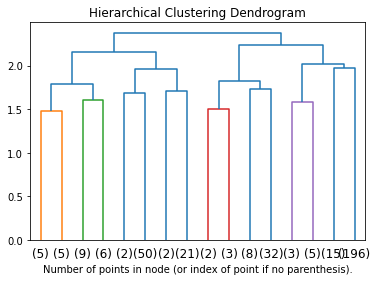

In [129]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agg_model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agg_model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

(next week)


## Matrix Factorization / Dimensionality Reduction

### SVD

In [ ]:
%%time 

from sklearn.decomposition import TruncatedSVD 

k = 10
svd = TruncatedSVD(n_components=k) 
U = svd.fit_transform(df)
S = svd.singular_values_
V = svd.components_

In [ ]:
U

In [ ]:
U.shape

In [ ]:
S

In [ ]:
S.shape

In [ ]:
V

In [ ]:
V.shape

### NMF

In [ ]:
%%time 

from sklearn.decomposition import NMF
nmf = NMF(n_components=k, init='nndsvd', random_state=0) 
W = nmf.fit_transform(df)
H = nmf.components_

In [ ]:
W

In [ ]:
W.shape

In [ ]:
H

In [ ]:
H.shape